In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import set_config
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.drop(columns=["Cabin","Name","Ticket"], inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x20492f38940>,
 'caps': [<matplotlib.lines.Line2D at 0x20492f38fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20492f38670>],
 'medians': [<matplotlib.lines.Line2D at 0x20492f5a4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20492f5a790>],
 'means': []}

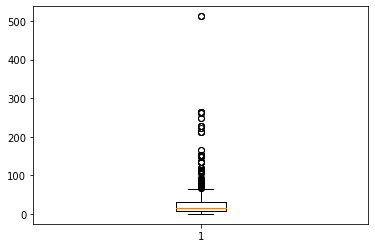

In [6]:
plt.boxplot(df["Fare"])

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

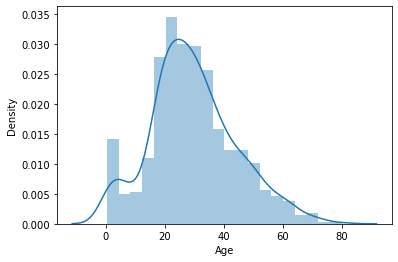

In [7]:
sns.distplot(df["Age"])

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

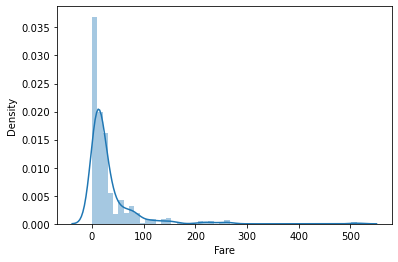

In [8]:
sns.distplot(df["Fare"])     # AS WE GOING TO USE RANDOM TREE SO DATA DOESNT REQUIRE TO BE NORMALLY DISTRIBUTED

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

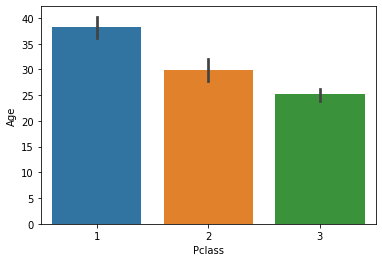

In [9]:
sns.barplot(df["Pclass"], df["Age"])

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

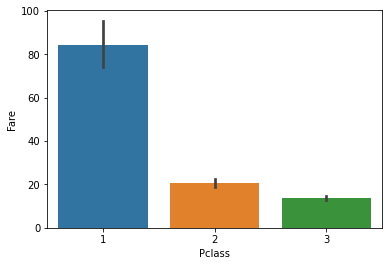

In [10]:
sns.barplot(df["Pclass"], df["Fare"])

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

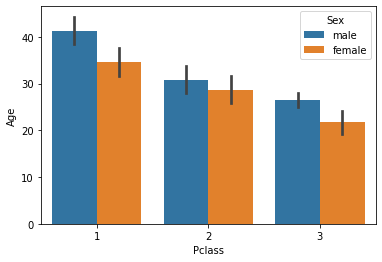

In [11]:
sns.barplot(df["Pclass"], df["Age"], hue=df["Sex"]) 

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

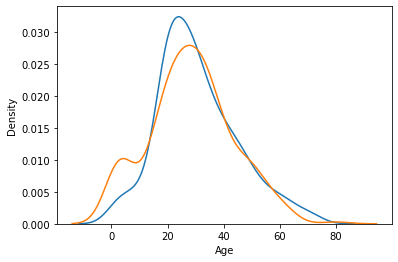

In [12]:
sns.distplot(df[df["Survived"]==0]["Age"],hist=False)
sns.distplot(df[df["Survived"]==1]["Age"],hist=False)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

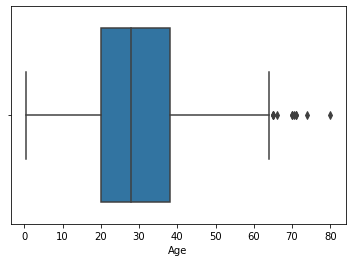

In [13]:
sns.boxplot(df["Age"])

In [14]:
upper_limit=df["Age"].quantile(0.95)
lower_limit=df["Age"].quantile(0.04)

In [15]:
df["Age"]=np.where(df["Age"]>upper_limit,upper_limit,
                  np.where(df["Age"]<lower_limit,lower_limit,df["Age"]))

In [16]:
df.drop(df[(df['Fare']>55)].index, inplace=True)

In [17]:
(df.Fare>55).value_counts()   #no outlier exists in the dataset

False    752
Name: Fare, dtype: int64

In [18]:
mean=df.Age.mean()
df.Age=df.Age.fillna(mean)

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,445.257979,0.327128,2.503989,28.422428,0.437500,0.339096,16.580186
std,260.291627,0.469477,0.715054,11.910587,0.909385,0.789858,11.734949
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,213.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,448.500000,0.000000,3.000000,28.422428,0.000000,0.000000,12.318750
75%,670.250000,1.000000,3.000000,34.000000,1.000000,0.000000,25.929200
max,891.000000,1.000000,3.000000,56.000000,5.000000,6.000000,55.000000


In [20]:
df.corr().PassengerId.sort_values(ascending=False)

PassengerId    1.000000
Age            0.024303
Fare          -0.002333
Parch         -0.013891
Survived      -0.038655
Pclass        -0.055901
SibSp         -0.086445
Name: PassengerId, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

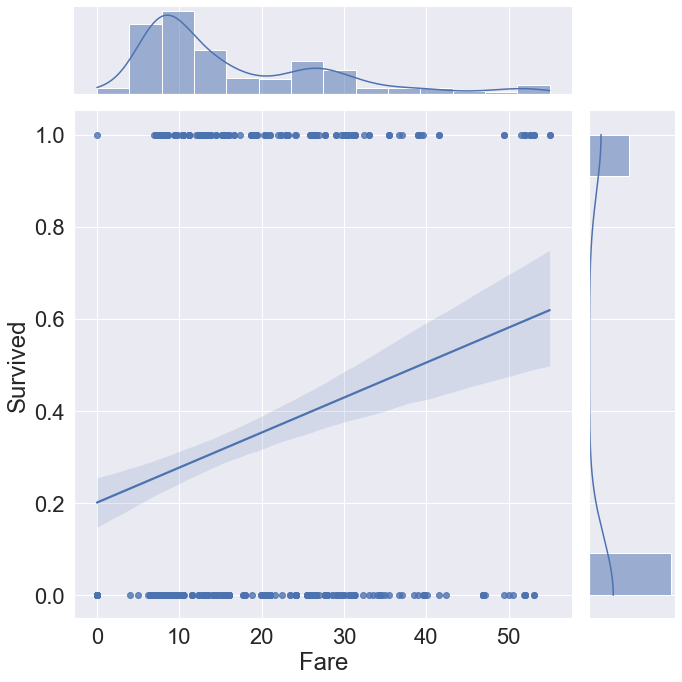

In [21]:
sns.set(font_scale=2)
sns.jointplot(data=df, x="Fare", y="Survived", kind="reg",height=10)
plt.show

In [22]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,28.422428,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,28.422428,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


<function matplotlib.pyplot.show(close=None, block=None)>

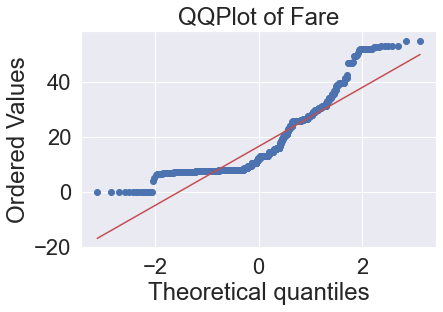

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(df["Fare"],dist="norm",plot=plt)
plt.title("QQPlot of Fare")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

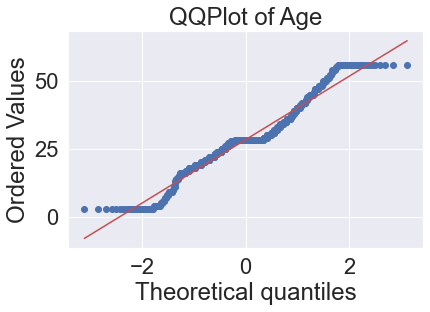

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(df["Age"],dist="norm",plot=plt)
plt.title("QQPlot of Age")
plt.show

In [25]:
df["Family_size"]=df.SibSp+ df.Parch
df.drop(columns=['SibSp','Parch'],inplace=True)

In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,1,0,3,male,22.000000,7.2500,S,1
2,3,1,3,female,26.000000,7.9250,S,0
3,4,1,1,female,35.000000,53.1000,S,1
4,5,0,3,male,35.000000,8.0500,S,0
5,6,0,3,male,28.422428,8.4583,Q,0
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,S,0
887,888,1,1,female,19.000000,30.0000,S,0
888,889,0,3,female,28.422428,23.4500,S,3
889,890,1,1,male,26.000000,30.0000,C,0


In [27]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns="Survived"),df["Survived"], test_size=0.3, random_state=42)

In [28]:
x_train

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family_size
253,254,3,male,30.0,16.1000,S,1
442,443,3,male,25.0,7.7750,S,1
482,483,3,male,50.0,8.0500,S,0
430,431,1,male,28.0,26.5500,S,0
363,364,3,male,35.0,7.0500,S,0
...,...,...,...,...,...,...,...
81,82,3,male,29.0,9.5000,S,0
122,123,2,male,32.5,30.0708,C,1
317,318,2,male,54.0,14.0000,S,0
516,517,2,female,34.0,10.5000,S,0


In [29]:
y_train

253    0
442    0
482    0
430    1
363    0
      ..
81     1
122    0
317    0
516    1
116    0
Name: Survived, Length: 526, dtype: int64

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 253 to 116
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  526 non-null    int64  
 1   Pclass       526 non-null    int64  
 2   Sex          526 non-null    object 
 3   Age          526 non-null    float64
 4   Fare         526 non-null    float64
 5   Embarked     526 non-null    object 
 6   Family_size  526 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 32.9+ KB


In [31]:
trf1=ColumnTransformer([('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"),[2,5])],remainder="passthrough")

In [32]:
trf2=XGBClassifier()
trf3=RandomForestClassifier()

In [33]:
pipe_1=make_pipeline(trf1,trf2)

In [34]:
pipe_2=make_pipeline(trf1,trf3)

In [35]:
pipe_1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 5])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                              

In [36]:
pipe_2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 5])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [37]:
set_config(display="diagram")

In [38]:
pred_1=pipe_1.predict(x_test)

In [39]:
pred_2=pipe_2.predict(x_test)

In [40]:
p1=precision_score(y_test,pred_1)
f1=f1_score(y_test,pred_1)
print(p1)
print(f1)


0.74
0.6324786324786325


In [41]:
p2=precision_score(y_test,pred_2)
f2=f1_score(y_test,pred_2)
print(p2)
print(f2)

0.7021276595744681
0.5789473684210525


In [42]:
accuracy1 = accuracy_score(y_test, pred_1)
print(accuracy1)
accuracy2 = accuracy_score(y_test, pred_2)
print(accuracy2)

0.8097345132743363
0.7876106194690266
